In [ ]:
pip install sklearn.cross_validation

ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [ ]:
pip install scipy

In [139]:
import pickle 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection  import train_test_split

In [140]:
df = pd.read_excel('/content/DATASET.xlsx')

In [141]:
df

,year,State,Area(hect),Production(tons),yield(kg/hect)
0,1974,Andhra Pradesh,3553.5,5700.3,1604.0
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0
2,1976,Andhra Pradesh,3565.2,4929.7,1383.0
3,1977,Andhra Pradesh,3662.3,5604.7,1530.0
4,1978,Andhra Pradesh,3979.1,7432.2,1868.0
...,...,...,...,...,...
1311,2016,DAMAN AND DIU,NaN,NaN,NaN
1312,2017,DAMAN AND DIU,NaN,NaN,NaN
1313,2018,DAMAN AND DIU,NaN,NaN,NaN
1314,2019,DAMAN AND DIU,NaN,NaN,NaN


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1316 non-null   int64  
 1   State             1316 non-null   object 
 2   Area(hect)        770 non-null    float64
 3   Production(tons)  770 non-null    float64
 4   yield(kg/hect)    770 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 51.5+ KB


In [143]:
df.describe()

,year,Area(hect),Production(tons),yield(kg/hect)
count,1316.000000,770.000000,770.000000,770.000000
mean,1997.000000,1494.191169,2408.490519,1605.866440
std,13.569817,1902.436624,3165.022459,634.827657
min,1974.000000,1.100000,1.600000,309.000000
25%,1985.000000,92.275000,111.575000,1121.000000
50%,1997.000000,302.950000,555.850000,1463.500000
75%,2009.000000,2341.125000,4252.975000,2013.250000
max,2020.000000,6176.000000,13951.000000,3579.000000


In [144]:
df.shape

(1316, 5)

In [145]:
df1 = df.drop(labels='yield(kg/hect)', axis = 1)

In [146]:
df1

,year,State,Area(hect),Production(tons)
0,1974,Andhra Pradesh,3553.5,5700.3
1,1975,Andhra Pradesh,3894.5,6451.3
2,1976,Andhra Pradesh,3565.2,4929.7
3,1977,Andhra Pradesh,3662.3,5604.7
4,1978,Andhra Pradesh,3979.1,7432.2
...,...,...,...,...
1311,2016,DAMAN AND DIU,NaN,NaN
1312,2017,DAMAN AND DIU,NaN,NaN
1313,2018,DAMAN AND DIU,NaN,NaN
1314,2019,DAMAN AND DIU,NaN,NaN


In [147]:
df1.corr()

,year,Area(hect),Production(tons)
year,1.000000,0.056291,0.217546
Area(hect),0.056291,1.000000,0.880579
Production(tons),0.217546,0.880579,1.000000


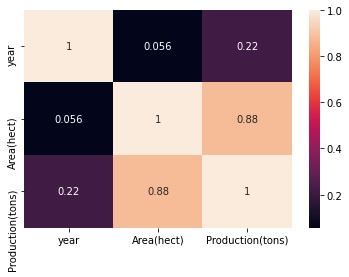

In [148]:
sns.heatmap(df1.corr(), annot = True)

In [149]:
labelencoder = LabelEncoder() 

In [150]:
df1['State']= labelencoder.fit_transform(df1['State'])

In [151]:
df1['State'].unique()

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27,  0,  5,  6])

In [152]:
df['State'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR',
       'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ORISSA', 'PUNJAB',
       'RAJASTHAN', 'SIKKIM', 'TAMILNADU', 'TRIPURA', 'UTTAR PRADESH',
       'WEST BENGAL', 'ANDAMAN & NICOBAR ', 'DADRA AND NAGAR',
       'DAMAN AND DIU'], dtype=object)

In [153]:
dict(zip(df['State'].unique(), df1['State'].unique()))

{'ANDAMAN & NICOBAR ': 0,
 'Andhra Pradesh': 1,
 'Arunachal Pradesh': 2,
 'Assam': 3,
 'Bihar': 4,
 'DADRA AND NAGAR': 5,
 'DAMAN AND DIU': 6,
 'Goa': 7,
 'Gujarat': 8,
 'Haryana': 9,
 'Himachal Pradesh': 10,
 'Jammu and Kashmir': 11,
 'KARNATAKA': 12,
 'KERALA': 13,
 'MADHYA PRADESH': 14,
 'MAHARASHTRA': 15,
 'MANIPUR': 16,
 'MEGHALAYA': 17,
 'MIZORAM': 18,
 'NAGALAND': 19,
 'ORISSA': 20,
 'PUNJAB': 21,
 'RAJASTHAN': 22,
 'SIKKIM': 23,
 'TAMILNADU': 24,
 'TRIPURA': 25,
 'UTTAR PRADESH': 26,
 'WEST BENGAL': 27}

In [154]:
list1 = [0]*28

In [155]:
list1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [156]:
df1

,year,State,Area(hect),Production(tons)
0,1974,1,3553.5,5700.3
1,1975,1,3894.5,6451.3
2,1976,1,3565.2,4929.7
3,1977,1,3662.3,5604.7
4,1978,1,3979.1,7432.2
...,...,...,...,...
1311,2016,6,NaN,NaN
1312,2017,6,NaN,NaN
1313,2018,6,NaN,NaN
1314,2019,6,NaN,NaN


In [157]:
onehotencoder = OneHotEncoder() 

In [158]:
encoded_df = pd.DataFrame(onehotencoder.fit_transform(df1[['State']]).toarray())

In [159]:
encoded_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1312,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1314,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
df2 = encoded_df.join(df1)

In [161]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,year,State,Area(hect),Production(tons)
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1974,1,3553.5,5700.3
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975,1,3894.5,6451.3
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976,1,3565.2,4929.7
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,1,3662.3,5604.7
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1978,1,3979.1,7432.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,6,NaN,NaN
1312,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,6,NaN,NaN
1313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,6,NaN,NaN
1314,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,6,NaN,NaN


In [162]:
df3 = df2.drop(labels = [0, 'State'], axis =1)

In [163]:
df3

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,year,Area(hect),Production(tons)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1974,3553.5,5700.3
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975,3894.5,6451.3
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976,3565.2,4929.7
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,3662.3,5604.7
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1978,3979.1,7432.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,NaN,NaN
1312,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,NaN,NaN
1313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,NaN,NaN
1314,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,NaN,NaN


In [164]:
df3.columns.tolist()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 'year',
 'Area(hect)',
 'Production(tons)']

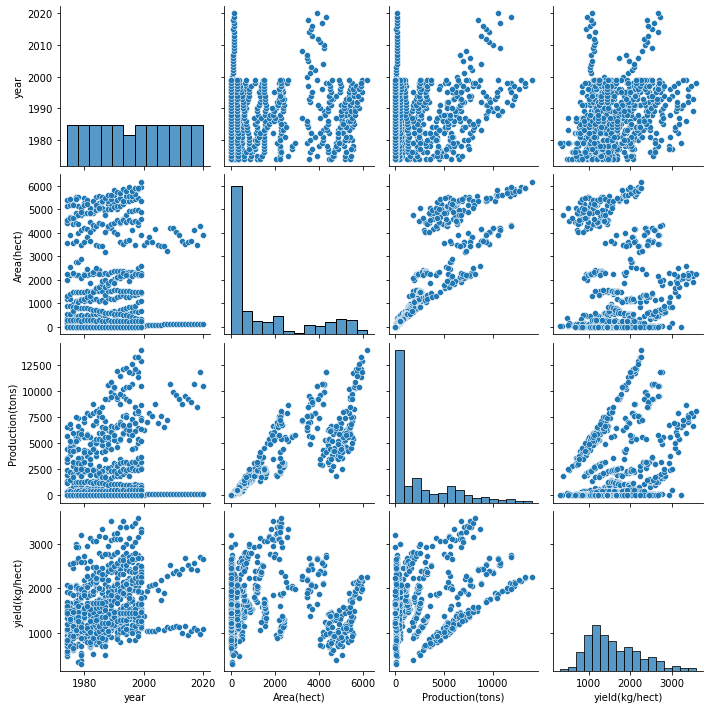

In [165]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


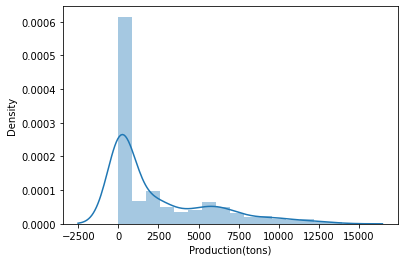

In [166]:
sns.distplot(df['Production(tons)'])

In [167]:
df3

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,year,Area(hect),Production(tons)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1974,3553.5,5700.3
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975,3894.5,6451.3
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976,3565.2,4929.7
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,3662.3,5604.7
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1978,3979.1,7432.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,NaN,NaN
1312,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,NaN,NaN
1313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,NaN,NaN
1314,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,NaN,NaN


In [168]:
df3.dropna(inplace=True)

In [169]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 1294
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1                 770 non-null    float64
 1   2                 770 non-null    float64
 2   3                 770 non-null    float64
 3   4                 770 non-null    float64
 4   5                 770 non-null    float64
 5   6                 770 non-null    float64
 6   7                 770 non-null    float64
 7   8                 770 non-null    float64
 8   9                 770 non-null    float64
 9   10                770 non-null    float64
 10  11                770 non-null    float64
 11  12                770 non-null    float64
 12  13                770 non-null    float64
 13  14                770 non-null    float64
 14  15                770 non-null    float64
 15  16                770 non-null    float64
 16  17                770 non-null    float64
 

In [170]:
X = df3.iloc[:, :29]

In [171]:
X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,year,Area(hect)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1974,3553.5
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975,3894.5
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976,3565.2
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,3662.3
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1978,3979.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,2.0
1291,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996,2.0
1292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997,2.0
1293,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998,2.0


In [172]:
Y = df3['Production(tons)']

In [173]:
Y

0       5700.3
1       6451.3
2       4929.7
3       5604.7
4       7432.2
         ...  
1290       2.9
1291       2.9
1292       2.9
1293       3.3
1294       3.3
Name: Production(tons), Length: 770, dtype: float64

In [174]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,  random_state = 20)

In [175]:
x_train.shape

(539, 29)

In [176]:
x_test.shape

(231, 29)

In [177]:
y_train.shape

(539,)

In [178]:
y_test.shape

(231,)

In [179]:
lm = LinearRegression()

In [180]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
print(lm.intercept_)

-65293.99068065921


In [182]:
lm.coef_

array([-5.15216167e+03, -5.35332787e+02, -5.34500451e+03, -1.23954054e+04,
        4.71874298e+01,  5.31081773e+01, -3.88958627e+01, -1.17927785e+03,
       -5.11295018e+02, -2.00758671e+02, -3.86794488e+02, -1.68196965e+03,
       -1.12662183e+03, -1.30032718e+04, -2.99988948e+03, -2.48107683e+02,
       -1.61543210e+02, -8.82853185e+01, -2.20054769e+02, -1.05254121e+04,
       -5.54724343e+02, -2.97490778e+02,  1.47865822e+01, -1.95271737e+03,
       -5.06300996e+02, -1.04658677e+04, -1.01305614e+04,  3.28496345e+01,
        3.51264436e+00])

In [183]:
x_train.columns

Index([           1,            2,            3,            4,            5,
                  6,            7,            8,            9,           10,
                 11,           12,           13,           14,           15,
                 16,           17,           18,           19,           20,
                 21,           22,           23,           24,           25,
                 26,           27,       'year', 'Area(hect)'],
      dtype='object')

In [184]:
pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"])

,Coefficient
1,-5152.161668
2,-535.332787
3,-5345.004510
4,-12395.405367
5,47.187430
6,53.108177
7,-38.895863
8,-1179.277849
9,-511.295018
10,-200.758671


In [186]:
prediction = lm.predict(x_test)

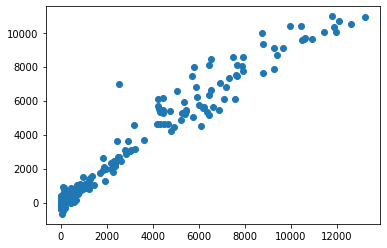

In [187]:
plt.scatter(y_test, prediction)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


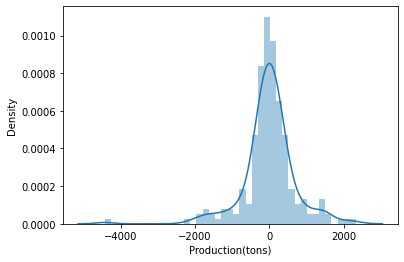

In [188]:
sns.distplot((y_test - prediction))

In [189]:
metrics.mean_absolute_error(y_test, prediction)

449.65046163431

In [190]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

704.7051852052972

In [191]:
metrics.explained_variance_score(y_test, prediction)

0.9567367942286946

In [192]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Save Model
filename = '/content/lrmodel.pkl'
pickle.dump(lm, open(filename, 'wb'))

In [ ]:
#Load Model
lr_saved_model = pickle.load(open(filename, 'rb'))
lr_saved_model.score(x_test, y_test)

0.9567350838371227

In [ ]:
final_features = [np.array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 2027, 1000])]
lr_saved_model.predict(final_features)

array([1277.6247931])

In [193]:
#SVM Model
svr_model = SVR()

In [194]:
svr_model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [195]:
print(" SVM Model Accuracy {}".format(svr_model.score(x_train, y_train)))
print(" SVM Model Accuracy {}".format(svr_model.score(x_test, y_test)))

 SVM Model Accuracy -0.2578363222115845
 SVM Model Accuracy -0.32575449439815607


In [200]:
#Save Model
filename1 = '/content/svregressormodel.pkl'
pickle.dump(svr_model, open(filename1, 'wb'))

In [201]:
#Load Model
svr_saved_model = pickle.load(open(filename1, 'rb'))
svr_saved_model.score(x_test, y_test)

-0.32575449439815607

In [202]:
svr_saved_model.predict(final_features)

array([596.68677994])